## Zadanie 1: Algorytm zachłannego dopasowania punktu

In [272]:
import matplotlib.pyplot as plt
import numpy as np

In [273]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [274]:
def miara_niepodobienstwa(ba, bb):
    miara = 0  # 1.	miara := 0
    
    black_ba = np.argwhere(ba == 1)
    black_bb = np.argwhere(bb == 1)
    
    for pay, pax in black_ba:  # 2.	Wykonaj pętlę dla każdego czarnego punktu o pozycji (pay, pax) w BA
        odl_min = float('inf')  # 2.1. odl_min = + nieskończoność
        
        for pby, pbx in black_bb:  # 2.2. Wykonaj pętlę dla każdego czarnego punktu o pozycji (pby, pbx) w BB
            odl_akt = euclidean_distance((pay, pax), (pby, pbx))  # 2.2.1. odl_akt := odległość między punktami (pay, pax) a (pby, pbx)
            odl_min = min(odl_min, odl_akt)  # 2.2.2. odl_min := min{odl_min, odl_akt}
        
        miara += odl_min  # 2.3. miara := miara + odl_min
    
    return miara

In [275]:
def miara_podobienstwa_obustronnego(bitmap_a, bitmap_b):
    return -(miara_niepodobienstwa(bitmap_a, bitmap_b) + miara_niepodobienstwa(bitmap_b, bitmap_a))

In [276]:
def predykcja_klasy(test_bitmap, bitmap_classes):
    best_match = None
    best_similarity = float('-inf')

    for i, bitmap in enumerate(bitmap_classes):
        similarity = miara_podobienstwa_obustronnego(test_bitmap, bitmap)
        
        if similarity > best_similarity:
            best_similarity = similarity
            best_match = i

    return best_match

In [277]:
def rysuj_iteracje(test_bitmap, class_bitmap, iteration):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    
    ax[0].imshow(test_bitmap, cmap='gray')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title(f'Bitmapa testowa nr. {iteration}')
    
    ax[1].imshow(class_bitmap, cmap='gray')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title(f'Bitmapa przewidywanej klasy')
    
    plt.show()

Bitmapy wzorcowe

In [278]:
one = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
])

two = np.array([
    [0, 1, 1, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 1, 1, 1]
])

three = np.array([
    [1, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 0]
])

Bitmapy testowe

In [279]:
test1 = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 1, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
])

test2 = np.array([
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 1]
])

test3 = np.array([
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 1]
])

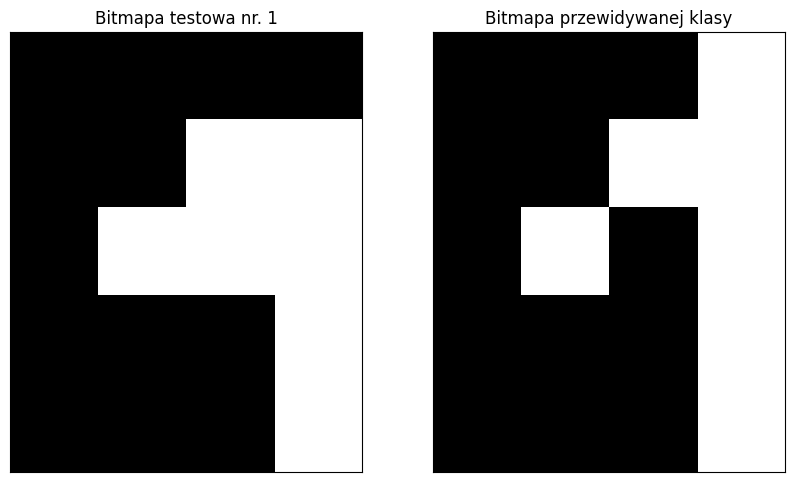

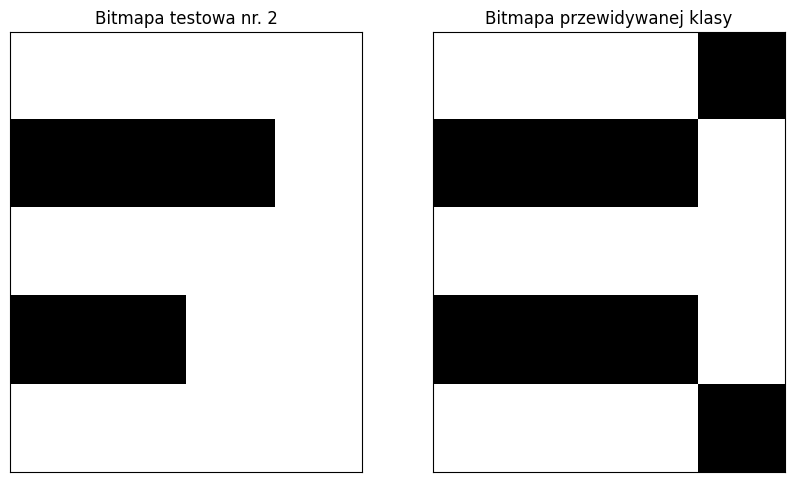

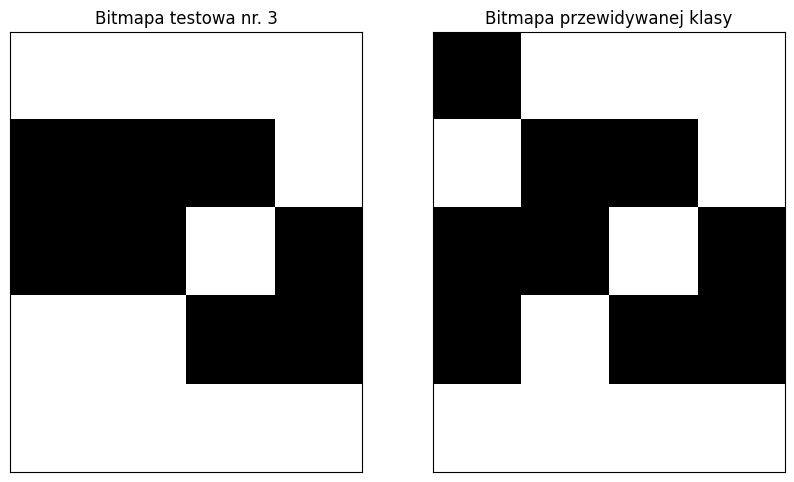

In [280]:
bitmaps = [one, two, three]
test_bitmaps = [test1, test2, test3]

for i, bitmap in enumerate(test_bitmaps):
    predicted_class = predykcja_klasy(bitmap, bitmaps)
    rysuj_iteracje(bitmap, bitmaps[predicted_class], i + 1)